In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PySpark").getOrCreate()
# spark

In [2]:
from pyspark.sql import functions as F
from pyspark.sql.types import *

In [3]:
def printdf(df, l=5):
    return df.limit(l).toPandas()

def nullcount(df):
    return {col: df.filter(df[col].isNull()).count() for col in df.columns}

def shape(df):
    print((df.count(), len(df.columns)))

# Load data
**dataset from RFM with PySpark**

In [19]:
rfm_numbers = spark.read.csv("retail_rfm_numbers.csv", inferSchema=True, header=True)
printdf(data)

,CustomerID,Recency,Frequency,Monetary
0,17420,51,30,598.83
1,16503,107,84,1431.93
2,15727,17,302,5178.96
3,17389,1,213,31833.68
4,15447,331,9,155.17


<!-- # Prepare data -->

# Inspect

In [20]:
df_rfm_numbers = rfm_numbers.toPandas()

In [21]:
df_rfm_numbers.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,92.722265,90.371079,1863.910113
std,1576.823683,99.528532,217.796155,7481.922217
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.000000,18.000000,17.000000,300.040000
50%,15569.000000,51.000000,41.000000,651.820000
75%,16913.000000,143.000000,99.000000,1575.890000
max,18287.000000,374.000000,7847.000000,259657.300000


<AxesSubplot:xlabel='Monetary', ylabel='Count'>

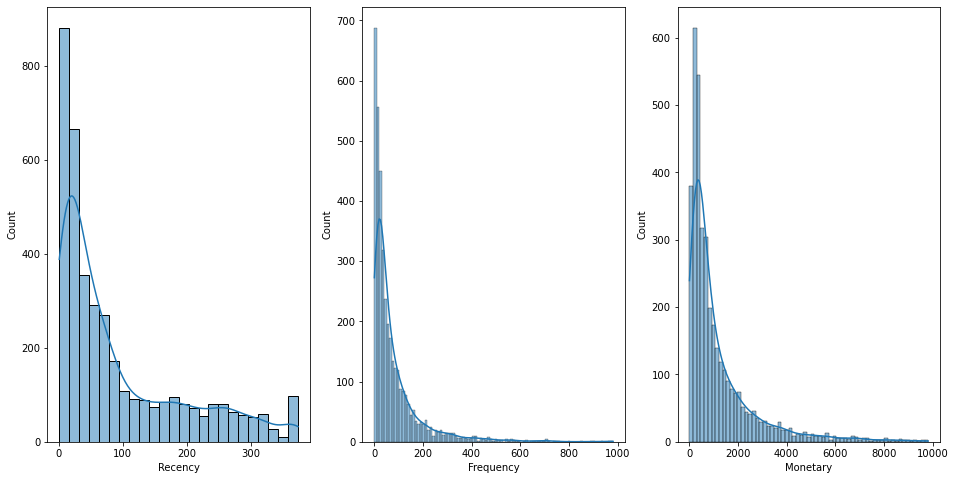

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Recency distribution plot
sns.histplot(df_rfm_numbers['Recency'], kde=True, ax=ax[0])

# Frequency distribution plot
sns.histplot(df_rfm_numbers.query('Frequency < 1000')['Frequency'], kde=True, ax=ax[1])

# Monetary distribution plot
sns.histplot(df_rfm_numbers.query('Monetary < 10000')['Monetary'], kde=True, ax=ax[2])

# K-Means Clustering

In [24]:
# Since log transformation doesn't work with negative and zero values, lets get rid of negative and zeros

rfm_data = (
    rfm_numbers.withColumn("Monetary", F.when(F.col("Monetary") <= 0, 1).otherwise(F.col("Monetary")))
#                .withColumn("Recency", F.when(F.col("Recency") <= 0, 1).otherwise(F.col("Recency")))
#                .withColumn("Frequency", F.when(F.col("Frequency") <= 0, 1).otherwise(F.col("Frequency")))
)
# printdf(rfm_loyalty)

In [25]:
# Perform Log transformation to bring data into normal or near normal distribution

rfm_data = (
    rfm_data.withColumn("Recency_log", F.log10(F.col("Recency")))
            .withColumn("Monetary_log", F.log10(F.col("Monetary")))
            .withColumn("Frequency_log", F.log10(F.col("Frequency")))
)
# printdf(rfm_loyalty)

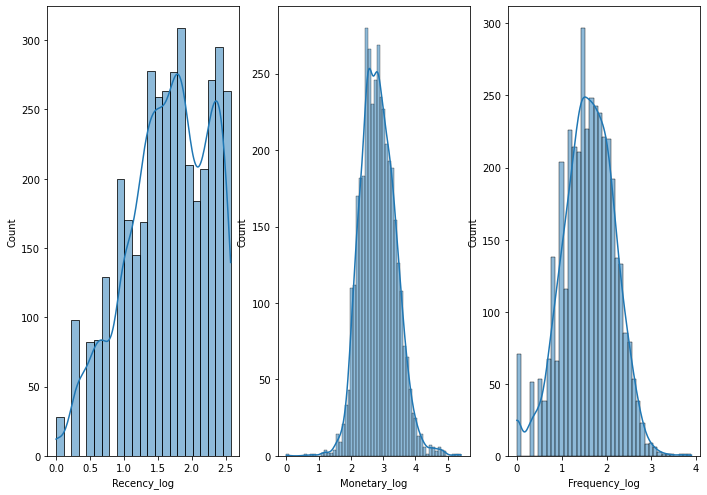

In [26]:
rfm_data_df = rfm_data.toPandas()

fig, ax = plt.subplots(1, 3, figsize=(11.7, 8.27))
sns.histplot(rfm_data_df['Recency_log'], kde=True, ax=ax[0])
sns.histplot(rfm_data_df['Monetary_log'], kde=True, ax=ax[1])
sns.histplot(rfm_data_df['Frequency_log'], kde=True, ax=ax[2])
plt.show()